In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reload the data, but now tell pandas to treat '?' as missing
#Notice that Horsepower is now a numeric column with six missing values.
cars = pd.read_csv('DATA/cars_multivariate.csv', na_values=['?'])

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [3]:
# Look at the dataset and drop rows where horsepower is notna

cars[cars.horsepower.notna()].info()
# above, there were still 398 rows, but horsepower only had 392. This changes all rows to 392 by dropping using: .notna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model         392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [4]:
#From here forward, we'll just drop those six rows with no horsepower data
cars = cars[cars.horsepower.notna()]
cars.info()
# this will change the original dataframe, but you can still get the full dataframe from the original file

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model         392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [5]:
cars['origin'] = cars['origin'].astype(str)
cars['model'] = cars['model'].astype(str)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model         392 non-null    object 
 7   origin        392 non-null    object 
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 30.6+ KB


In [6]:
import seaborn as sns
numeric_vars = ['mpg','displacement','horsepower','weight','acceleration']
categorical_vars = ['model', 'origin', 'cylinders','car_name']
# not breaking it down dependent vs independent, just splitting it btwn numerical and categorical variables

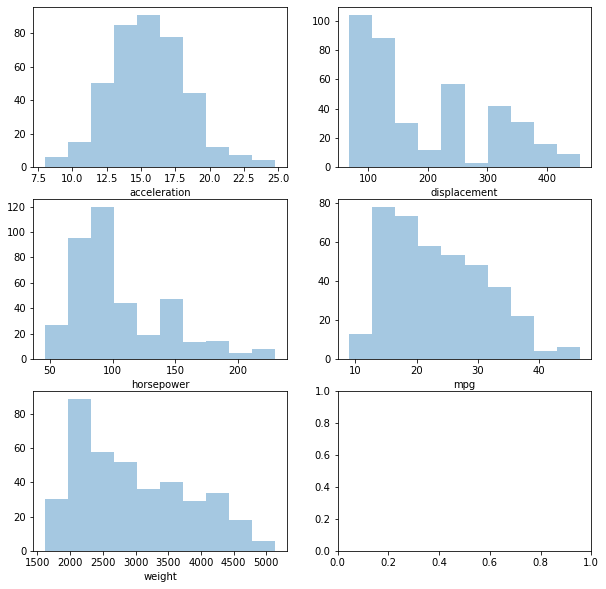

In [14]:
# Histograms
# x = cars[numeric_vars].values
# sns.distplot(x, bins=10, kde=False);
# jaquelin's code is below.
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)
sns.distplot(cars['acceleration'], bins=10, kde=False, ax=axes[0,0])
sns.distplot(cars['displacement'], bins=10, kde=False, ax=axes[0,1])
sns.distplot(cars['horsepower'], bins=10, kde=False, ax=axes[1,0])
sns.distplot(cars['mpg'], bins=10, kde=False, ax=axes[1,1])
sns.distplot(cars['weight'], bins=10, kde=False, ax=axes[2,0])

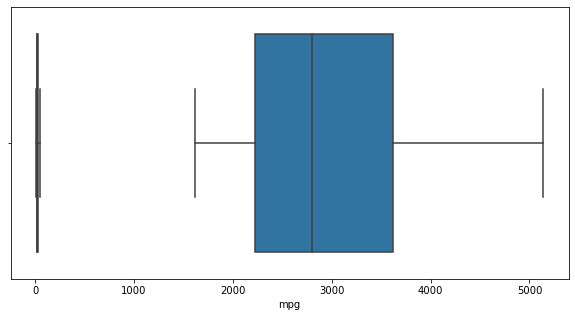

In [19]:
#Box Plots
f,ax = plt.subplots(figsize=(10,5), sharex=False)
sns.boxplot(x=cars['weight'])
sns.boxplot(x=cars['mpg'])
# ax = sns.boxplot(x=cars[numeric_vars],data=cars)

In [ ]:
#Bar Graph
agg = cars.groupby('origin').apply(len)
ax = sns.barplot(x=agg['origin'],data=cars)